In [2]:
function broyden(F , JF , x0 , A0 , precision = 1.e-8)
x1 = x0
x = x0
A1=inv(A0)
for i = 1:100
    step = -A1*F(x1)
    x=x1
    x1 = x1 + step
    S=x1-x
    V=F(x1)-F(x)
    A1=inv(A0)+((S-inv(A0)*V)*transpose(S)*inv(A0))/(transpose(S)*inv(A0)*V)
    A0=A1+(V-A1*S)*transpose(S)/(norm(S)^2)
println("step ", i, ":\t x=", x, " ", norm(F(x)))
    if (norm(F(x)) < precision)
        return x
    end
end
error("no convergence")
end

broyden (generic function with 2 methods)

In [3]:
function newton(F, JF, x0, precision = 1.e-8)
x = x0;
for i = 1:100
step = - inv(JF(x)) * F(x)
x = x + step
println("step ", i, ":\t x=", x, " ", norm(F(x)))
if (norm(F(x)) < precision)
return x
end
end
error("no convergence")
end

newton (generic function with 2 methods)

In [4]:
F(x)=[2x[1]^2+x[2];x[1]-x[2]-1]
JF(x)=[4*x[1] 1;1 -1]
x0=[0;0]
A0=eye(2)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [5]:
newton(F, JF, x0)

step 1:	 x=[1.0, 0.0] 2.0
step 2:	 x=[0.6, -0.4] 0.31999999999999995
step 3:	 x=[0.505882, -0.494118] 0.01771626297577844
step 4:	 x=[0.500023, -0.499977] 6.866664630500452e-5
step 5:	 x=[0.5, -0.5] 1.0477378964424133e-9


2-element Array{Float64,1}:
  0.5
 -0.5

In [6]:
using PyPlot
using Polynomials
f1(x)=1/(1+25*x^2)
g1(x)=sqrt(abs(x))
Precision = 4
c=Precision

4

In [7]:
function Lagrangeinside(n, i,a)
L=Poly([1.0])
for j=1:n
if (j!=i)
L=L*Poly([-a[j],1.0])/(a[i]-a[j])
end
end
return L
end

Lagrangeinside (generic function with 1 method)

In [8]:
function Lagrangeoutside(f,n,x,precision)
L1=Poly([0])
for i=1:n
L1=L1+f(x[i])*Lagrangeinside(n,i,x)
end
return L1
end

Lagrangeoutside (generic function with 1 method)

In [9]:
function vander{T}(x::AbstractVector{T}, n=length(x))
m = length(x)
V = Array(T, m, n)
for j = 1:m
V[j,1] = one(x[j])
end
for i = 2:n
for j = 1:m
V[j,i] = x[j] * V[j,i-1]
end
end
return V
end

vander (generic function with 2 methods)

In [10]:
n=5
x=-1:2/(n-1):1
println("x= ",x)
A=vander(x)

x= -1.0:0.5:1.0


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64, ::Int64) at ./deprecated.jl:57
 [3] vander(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}, ::Int64) at ./In[9]:3
 [4] vander(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./In[9]:2
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] include_string(::Module, ::String, ::String) at /opt/julia_packages/.julia/v0.6/Compat/src/Compat.jl:464
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[10], in expression starting on line 4


5×5 Array{Float64,2}:
 1.0  -1.0  1.0   -1.0    1.0   
 1.0  -0.5  0.25  -0.125  0.0625
 1.0   0.0  0.0    0.0    0.0   
 1.0   0.5  0.25   0.125  0.0625
 1.0   1.0  1.0    1.0    1.0   

In [11]:
 LF1=Lagrangeoutside(f1,n,x,c)

Poly(1.0 + 5.204170427930421e-18*x - 4.277188328912466*x^2 - 1.734723475976807e-17*x^3 + 3.315649867374005*x^4)

In [12]:
b=zeros(n)
for i=1:n
b[i]=f1(x[i])
end
An=inv(A)*b
AF1=Poly(An)

Poly(1.0 + 1.734723475976807e-18*x - 4.277188328912467*x^2 + 1.0408340855860843e-17*x^3 + 3.315649867374005*x^4)

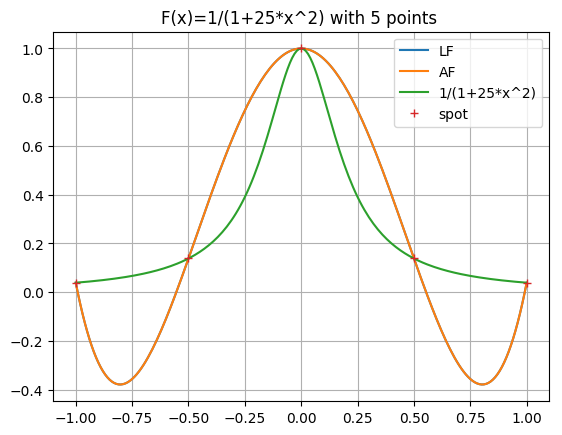

PyObject <matplotlib.text.Text object at 0x7fa01cb87e50>

In [13]:
x1=linspace(-1,1,201)
y=ones(length(x1))
y2=ones(length(x))
for i=1:length(x1)
y[i]=1/(1+25*x1[i]^2)
end
for i=1:length(x)
y2[i]=1/(1+25*x[i]^2)
end
grid("on")
plot(x1,LF1(x1),label="LF")
plot(x1,AF1(x1),label="AF")
plot(x1,y,label="1/(1+25*x^2)")
plot(x,y2,"+",label="spot")
legend()
title("F(x)=1/(1+25*x^2) with 5 points ")

In [14]:
LG1=Lagrangeoutside(g1,n,x,c)

Poly(-2.7755575615628914e-17*x + 3.437902832994921*x^2 - 1.1102230246251565e-16*x^3 - 2.4379028329949204*x^4)

In [15]:
b=zeros(n)
for i=1:n
b[i]=g1(x[i])
end
An=inv(A)*b
AG1=Poly(An)

Poly(3.437902832994921*x^2 - 2.437902832994921*x^4)

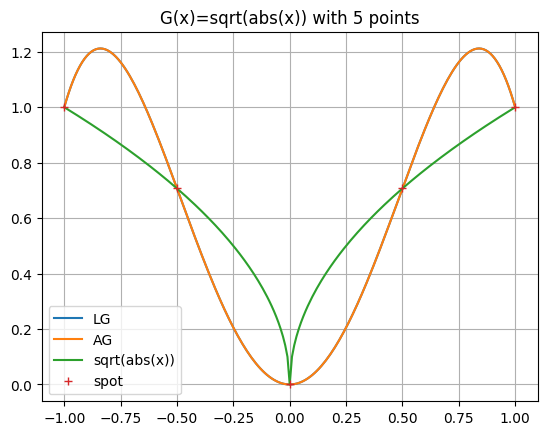

PyObject <matplotlib.text.Text object at 0x7fa01ca70bd0>

In [16]:
x2=linspace(-1,1,201)
y=ones(length(x2))
y2=ones(length(x))
for i=1:length(x2)
y[i]=sqrt(abs(x2[i]))
end
for i=1:length(x)
    y2[i]=sqrt(abs(x[i]))
end
grid("on")
plot(x2,LG1(x2),label="LG")
plot(x2,AG1(x2),label="AG")
plot(x2,y,label="sqrt(abs(x))")
plot(x,y2,"+",label="spot")
legend()
title("G(x)=sqrt(abs(x)) with 5 points")

In [17]:
n=8
x=-1:2/(n-1):1
println("x= ",x)
A=vander(x)

x= -1.0:0.2857142857142857:1.0


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64, ::Int64) at ./deprecated.jl:57
 [3] vander(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}, ::Int64) at ./In[9]:3
 [4] vander(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./In[9]:2
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] include_string(::Module, ::String, ::String) at /opt/julia_packages/.julia/v0.6/Compat/src/Compat.jl:464
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[17], in expression starting on line 4


8×8 Array{Float64,2}:
 1.0  -1.0       1.0        …  -1.0        1.0         -1.0       
 1.0  -0.714286  0.510204      -0.185934   0.13281     -0.0948645 
 1.0  -0.428571  0.183673      -0.0144583  0.0061964   -0.0026556 
 1.0  -0.142857  0.0204082     -5.9499e-5  8.49986e-6  -1.21427e-6
 1.0   0.142857  0.0204082      5.9499e-5  8.49986e-6   1.21427e-6
 1.0   0.428571  0.183673   …   0.0144583  0.0061964    0.0026556 
 1.0   0.714286  0.510204       0.185934   0.13281      0.0948645 
 1.0   1.0       1.0            1.0        1.0          1.0       

In [23]:
LF2=Lagrangeoutside(f1,n,x,c)

Poly(0.7526413934406849 - 2.2424011432431445e-16*x - 4.6165514479277485*x^2 - 5.139118297581291e-15*x^3 + 9.075970295721387*x^4 - 9.769962616701378e-15*x^5 - 5.173598702772763*x^6 - 7.049916206369744e-15*x^7)

In [24]:
b=zeros(n)
for i=1:n
b[i]=f1(x[i])
end
An=inv(A)*b
AF2=Poly(An)

Poly(0.7526413934406856 + 1.8701267747930905e-15*x - 4.616551447927749*x^2 - 1.1364173491124063e-14*x^3 + 9.075970295721374*x^4 + 1.8512968935624485e-14*x^5 - 5.173598702772768*x^6 - 9.159339953157541e-15*x^7)

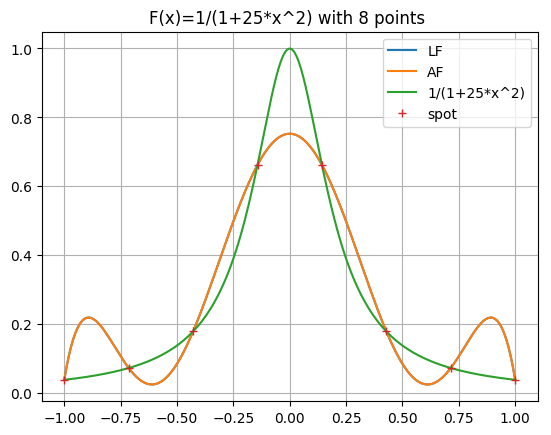

PyObject <matplotlib.text.Text object at 0x7fa01c74a190>

In [26]:
x1=linspace(-1,1,201)
y=ones(length(x1))
y2=ones(length(x))
for i=1:length(x1)
y[i]=1/(1+25*x1[i]^2)
end
for i=1:length(x)
y2[i]=1/(1+25*x[i]^2)
end
grid("on")
plot(x1,LF2(x1),label="LF")
plot(x1,AF2(x1),label="AF")
plot(x1,y,label="1/(1+25*x^2)")
plot(x,y2,"+",label="spot")
legend()
title("F(x)=1/(1+25*x^2) with 8 points ")

In [27]:
LG2=Lagrangeoutside(g1,n,x,c)

Poly(0.33108289901811144 - 4.540638698369293e-16*x + 2.371568212097579*x^2 - 5.551115123125783e-17*x^3 - 3.6846318261333972*x^4 - 1.9984014443252818e-15*x^5 + 1.9819807150177144*x^6 + 1.9984014443252818e-15*x^7)

In [28]:
b=zeros(n)
for i=1:n
b[i]=g1(x[i])
end
An=inv(A)*b
AG2=Poly(An)

Poly(0.3310828990181112 - 8.430756093247282e-16*x + 2.371568212097576*x^2 + 2.0650148258027912e-14*x^3 - 3.684631826133396*x^4 + 7.105427357601002e-15*x^5 + 1.9819807150177091*x^6 - 8.881784197001252e-16*x^7)

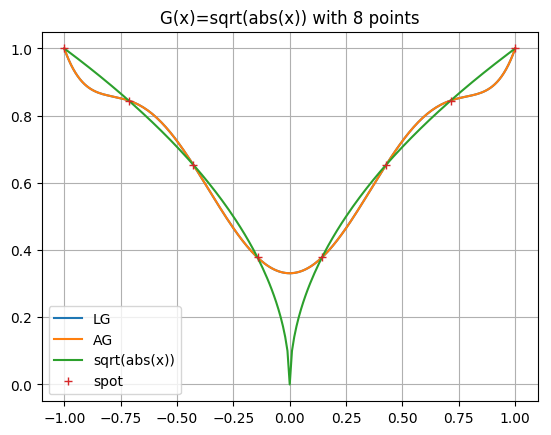

PyObject <matplotlib.text.Text object at 0x7fa01c6a79d0>

In [29]:
 x2=linspace(minimum(x),maximum(x),201)
y=ones(length(x2))
y2=ones(length(x))
for i=1:length(x2)
y[i]=sqrt(abs(x2[i]))
end
for i=1:length(x)
y2[i]=sqrt(abs(x[i]))
end
grid("on")
plot(x2,LG2(x2),label="LG")
plot(x2,AG2(x2),label="AG")
plot(x2,y,label="sqrt(abs(x))")
plot(x,y2,"+",label="spot")
legend()
title("G(x)=sqrt(abs(x)) with 8 points")

In [31]:
n=20
x=-1:2/(n-1):1
println("x= ",x)
A=vander(x)

x= -1.0:0.10526315789473684:1.0


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64, ::Int64) at ./deprecated.jl:57
 [3] vander(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}, ::Int64) at ./In[9]:3
 [4] vander(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./In[9]:2
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] include_string(::Module, ::String, ::String) at /opt/julia_packages/.julia/v0.6/Compat/src/Compat.jl:464
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[31], in expression starting on line 4


20×20 Array{Float64,2}:
 1.0  -1.0        1.0         -1.0          …  1.0          -1.0        
 1.0  -0.894737   0.800554    -0.716285        0.135057     -0.12084    
 1.0  -0.789474   0.623269    -0.492054        0.0141931    -0.0112051  
 1.0  -0.684211   0.468144    -0.320309        0.00107998   -0.000738933
 1.0  -0.578947   0.33518     -0.194052        5.33954e-5   -3.09131e-5 
 1.0  -0.473684   0.224377    -0.106284     …  1.44145e-6   -6.82793e-7 
 1.0  -0.368421   0.135734    -0.0500073       1.56387e-8   -5.76162e-9 
 1.0  -0.263158   0.0692521   -0.0182242       3.66349e-11  -9.64077e-12
 1.0  -0.157895   0.0249307   -0.00393643      3.72064e-15  -5.8747e-16 
 1.0  -0.0526316  0.00277008  -0.000145794     9.60362e-24  -5.05454e-25
 1.0   0.0526316  0.00277008   0.000145794  …  9.60362e-24   5.05454e-25
 1.0   0.157895   0.0249307    0.00393643      3.72064e-15   5.8747e-16 
 1.0   0.263158   0.0692521    0.0182242       3.66349e-11   9.64077e-12
 1.0   0.368421   0.135734 

In [32]:
LF3=Lagrangeoutside(f1,n,x,c)

Poly(0.9926812522553939 + 4.0698189915146237e-16*x - 21.623507486949674*x^2 + 9.113003337650515e-13*x^3 + 327.72642412374074*x^4 + 3.3191387301383796e-11*x^5 - 3055.324813160514*x^6 + 1.2614789074438804e-9*x^7 + 17172.48776600968*x^8 - 3.4957346600750228e-9*x^9 - 58584.97583416813*x^10 - 1.5573965495008224e-7*x^11 + 121018.60064166687*x^12 - 2.4497906636611333e-7*x^13 - 146791.49574645874*x^14 + 3.0868401168504533e-9*x^15 + 95604.81325650876*x^16 + 1.2259854020868488e-8*x^17 - 25671.16240636437*x^18 + 5.681317638561723e-10*x^19)

In [34]:
b=zeros(n)
for i=1:n
b[i]=f1(x[i])
end
An=inv(A)*b
AF3=Poly(An)

Poly(0.9926812522606017 + 1.4195619899280981e-11*x - 21.62350748702567*x^2 - 1.2531028361814137e-9*x^3 + 327.72642412967014*x^4 + 1.9509630103445568e-8*x^5 - 3055.324813296402*x^6 - 1.5951412859344094e-7*x^7 + 17172.487767176244*x^8 + 8.743989303172661e-7*x^9 - 58584.97583917319*x^10 - 3.363110195331309e-6*x^11 + 121018.60065302793*x^12 + 8.255022227343645e-6*x^13 - 146791.49576177818*x^14 - 1.178633576159882e-5*x^15 + 95604.81326692429*x^16 + 8.776003395549736e-6*x^17 - 25671.16240923636*x^18 - 2.6156294081758347e-6*x^19)

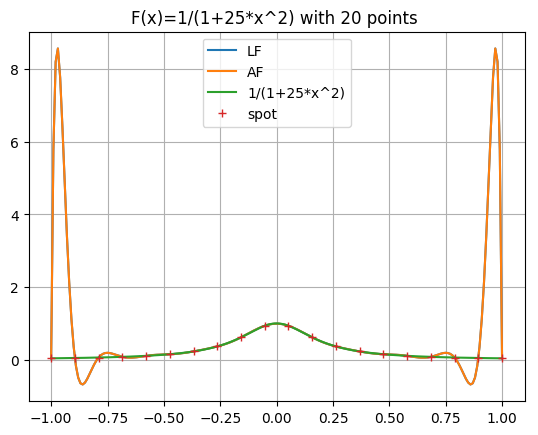

PyObject <matplotlib.text.Text object at 0x7fa01c5aa8d0>

In [35]:
x1=linspace(minimum(x),maximum(x),201)
y=ones(length(x1))
y2=ones(length(x))
for i=1:length(x1)
y[i]=1/(1+25*x1[i]^2)
end
for i=1:length(x)
y2[i]=1/(1+25*x[i]^2)
end
grid("on")
plot(x1,LF3(x1),label="LF")
plot(x1,AF3(x1),label="AF")
plot(x1,y,label="1/(1+25*x^2)")
plot(x,y2,"+",label="spot")
legend()
title("F(x)=1/(1+25*x^2) with 20 points ")

In [36]:
LG3=Lagrangeoutside(g1,n,x,c)

Poly(0.19724011133354585 - 3.5651669689492705e-17*x + 12.197237790633759*x^2 + 3.7502742881653783e-14*x^3 - 216.24877987380785*x^4 + 1.6190503798751976e-12*x^5 + 2277.712610191132*x^6 + 4.1800538030933865e-10*x^7 - 13715.023893144384*x^8 + 1.2126579740368015e-9*x^9 + 48704.7145392691*x^10 - 2.7142078806718928e-8*x^11 - 103120.90351666966*x^12 - 3.3759469886263105e-8*x^13 + 127089.60290666197*x^14 + 2.2872839622323227e-8*x^15 - 83663.80138718899*x^16 + 8.734900802664924e-9*x^17 + 22632.553042878943*x^18 + 2.759286132913985e-10*x^19)

In [37]:
b=zeros(n)
for i=1:n
b[i]=g1(x[i])
end
An=inv(A)*b
AG3=Poly(An)

Poly(0.19724011132916008 - 1.2465373563347163e-11*x + 12.197237790702037*x^2 + 1.0752869853206115e-9*x^3 - 216.2487798789934*x^4 - 1.682253716883686e-8*x^5 + 2277.712610309776*x^6 + 1.3991310510164112e-7*x^7 - 13715.023894156398*x^8 - 7.818108969104287e-7*x^9 + 48704.714543584734*x^10 + 3.0351766895364563e-6*x^11 - 103120.90352686543*x^12 - 7.469804813808878e-6*x^13 + 127089.60291997019*x^14 + 1.0645817155818804e-5*x^15 - 83663.80139626592*x^16 - 7.90886883805797e-6*x^17 + 22632.553045400324*x^18 + 2.3536712205896038e-6*x^19)

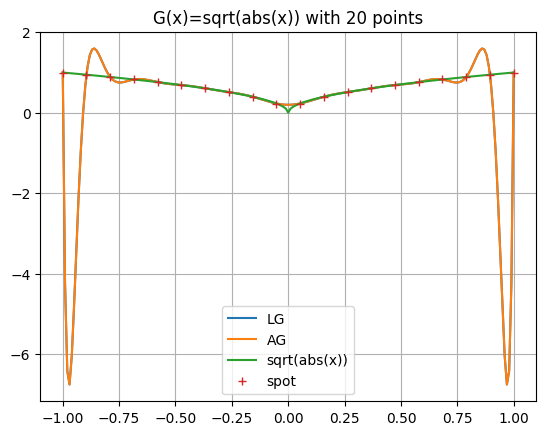

PyObject <matplotlib.text.Text object at 0x7fa01c5aa910>

In [38]:
x2=linspace(minimum(x),maximum(x),201)
y=ones(length(x2))
y2=ones(length(x))
for i=1:length(x2)
y[i]=sqrt(abs(x2[i]))
end
for i=1:length(x)
y2[i]=sqrt(abs(x[i]))
end
grid("on")
plot(x2,LG3(x2),label="LG")
plot(x2,AG3(x2),label="AG")
plot(x2,y,label="sqrt(abs(x))")
plot(x,y2,"+",label="spot")
legend()
title("G(x)=sqrt(abs(x)) with 20 points")

In [39]:
println("problemIV")

problemIV


In [45]:
x3=[0.1,0,0.2,0.3]
p=[Poly([5.3]),Poly([2.0]),Poly([3.19]),Poly([1.0])]
len=length(x3)-1

3

In [54]:
function NewtonInter(x,len,p)
    for i=1:len
        p[i]=(Poly([-x[i],1])*p[i+1]-Poly([-x[i+1],1])*p[i])/(x[i]-x[i+1])
    end
end

NewtonInter (generic function with 1 method)

In [57]:
for j=1:len
    NewtonInter(x3,len,p)
    len=len-1
end
p[1]

Poly(-2.0 - 33.8*x + 417.75000000000006*x^2 - 4097.5*x^3)